In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
#

Uses dataset and store it

In [2]:
# Load dataset
df = pd.read_csv("/content/sample_data/heart.csv")

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Checks data types, non-null counts and categorical vs numerical intuition of data


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Analysing the missing values if any

In [5]:
df.isnull().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Duplicate check and dropping it


In [7]:
df.duplicated().sum()
df = df.drop_duplicates()

In [9]:
df['target'].value_counts(normalize=True)*100


,proportion
target,
1,54.304636
0,45.695364


The dataset shows a near-balanced target distribution (≈54% positive, ≈46% negative), reducing risks of class imbalance and enabling the use of standard evaluation metrics such as accuracy and ROC-AUC without bias.


Visualizing it

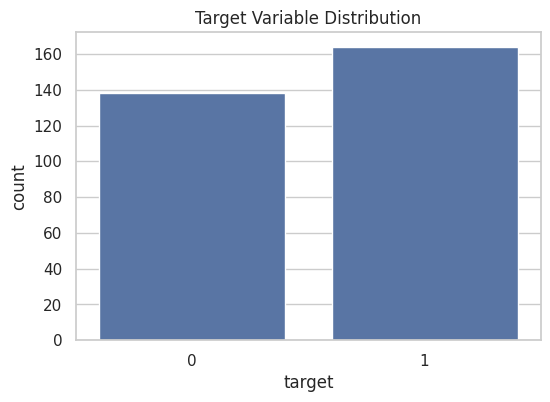

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df)
plt.title("Target Variable Distribution")
plt.show()


<Figure size 1600x1400 with 0 Axes>

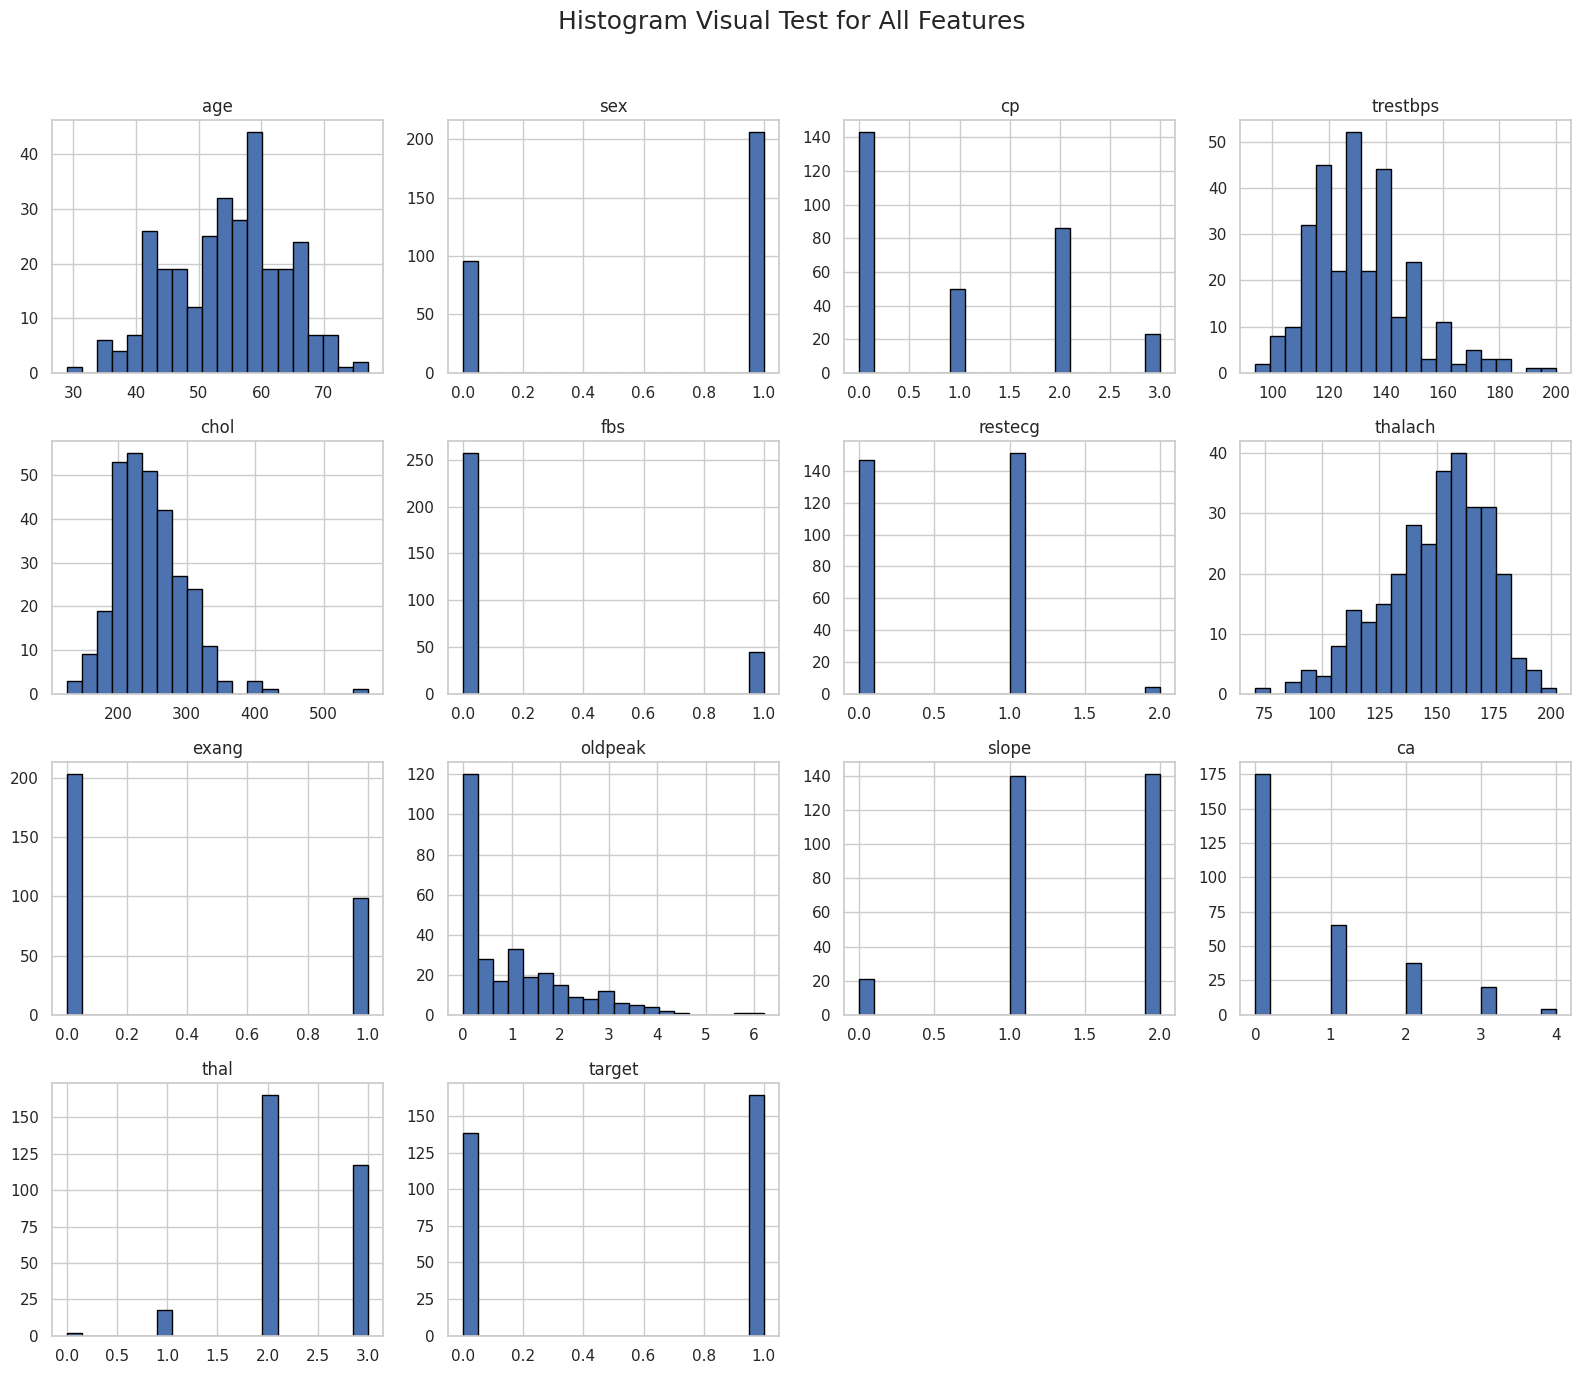

In [12]:
plt.figure(figsize=(16, 14))

df.hist(
    bins=20,
    figsize=(16, 14),
    edgecolor='black'
)

plt.suptitle("Histogram Visual Test for All Features", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Histogram-Based Feature Assessment:
Features such as age, cholesterol, resting blood pressure, maximum heart rate, and ST depression show continuous distributions and are treated as numerical variables. Other features exhibit discrete spikes with limited unique values, indicating categorical behavior despite being numerically encoded.

In [11]:
categorical_features = [
    'sex', 'cp', 'fbs', 'restecg',
    'exang', 'slope', 'ca', 'thal'
]

numerical_features = [
    'age', 'trestbps', 'chol',
    'thalach', 'oldpeak'
]


Numerical Feature Distribution


In [13]:
df[numerical_features].describe()


,age,trestbps,chol,thalach,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


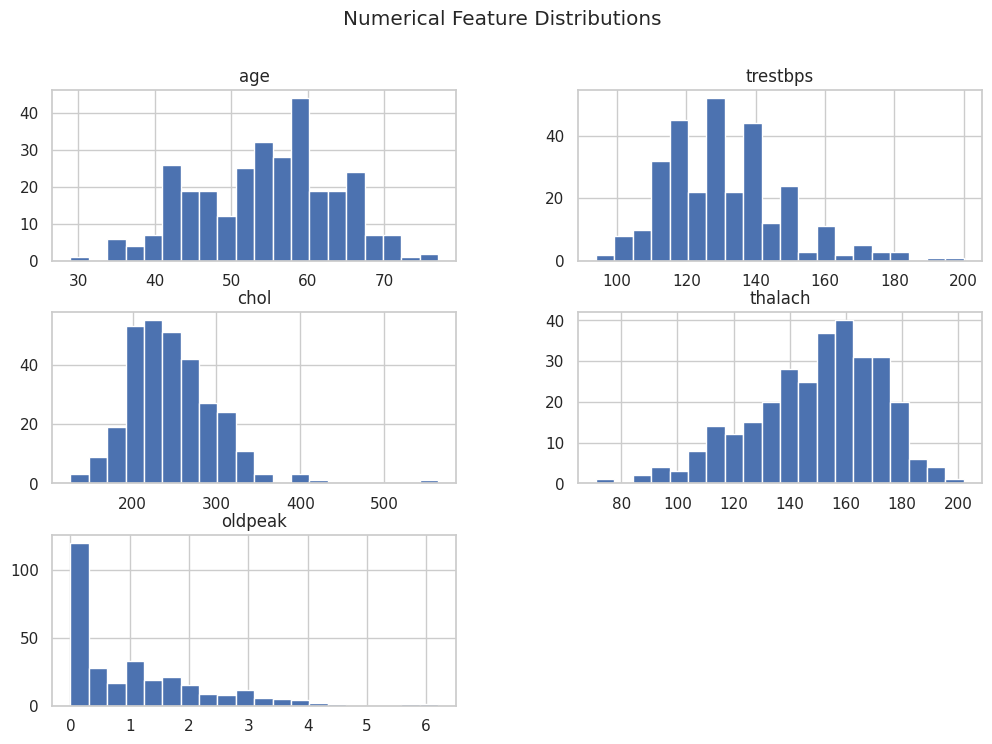

In [14]:
df[numerical_features].hist(figsize=(12,8), bins=20)
plt.suptitle("Numerical Feature Distributions")
plt.show()


CategoricalFeature Distribution

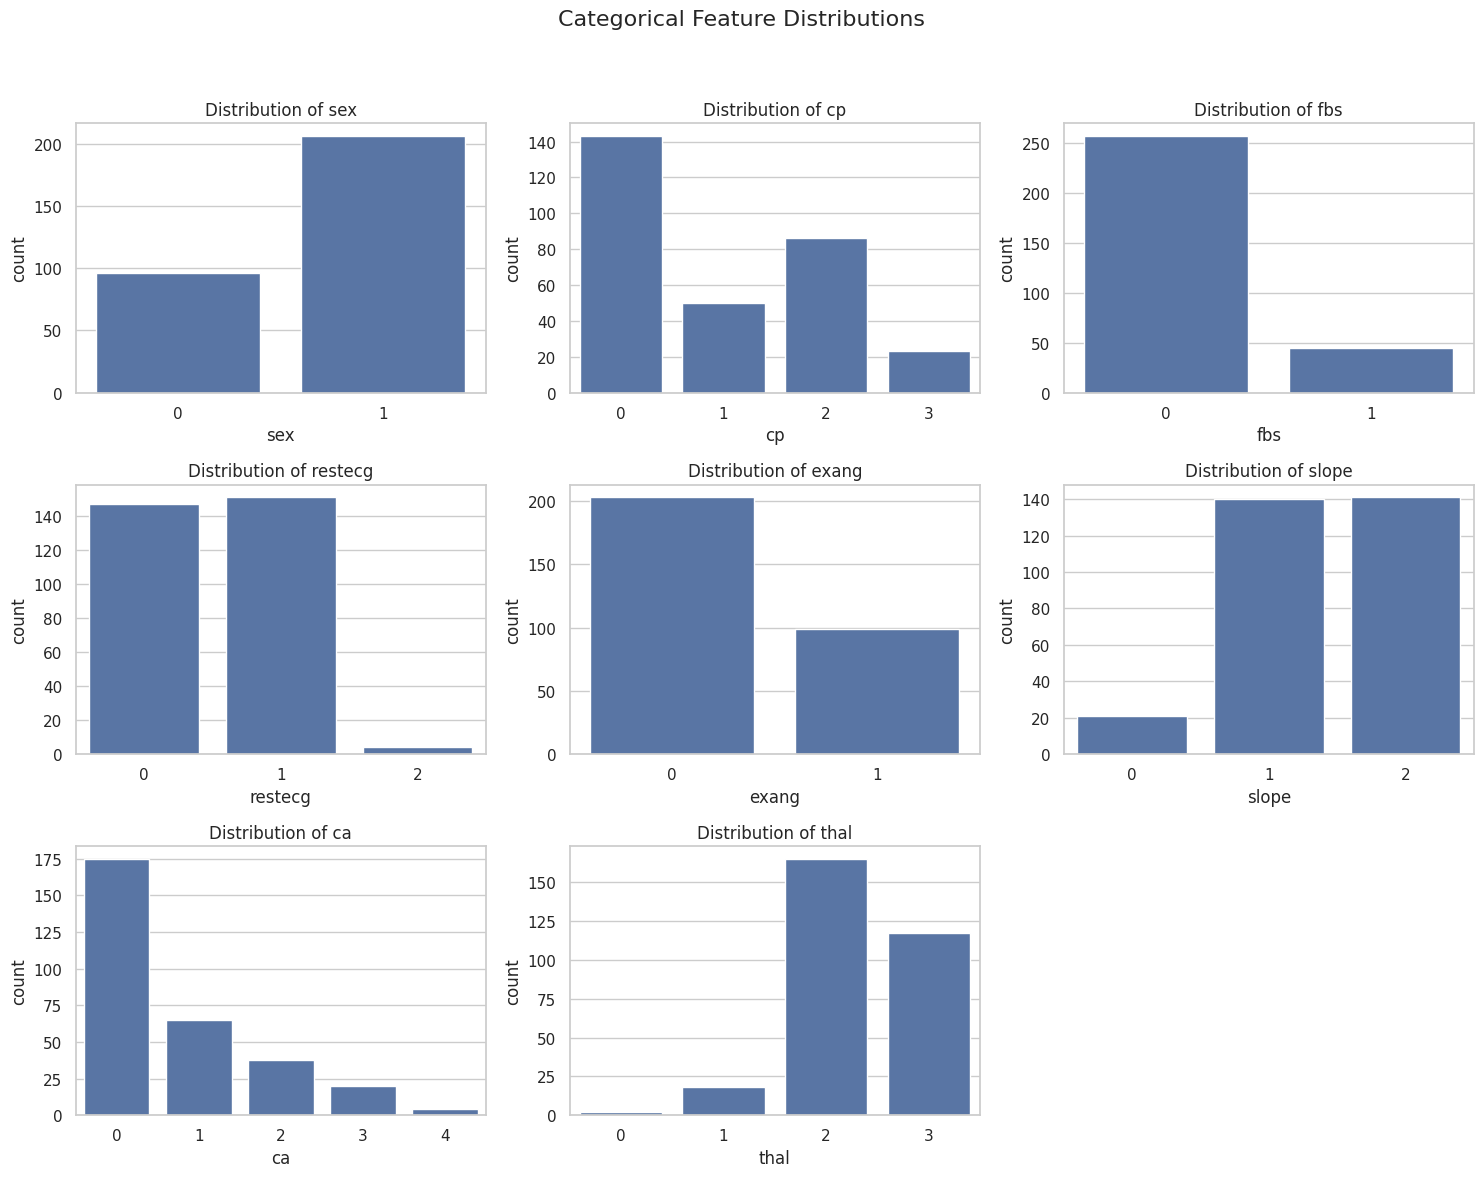

In [18]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Categorical Feature Distributions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Numerical vs Target

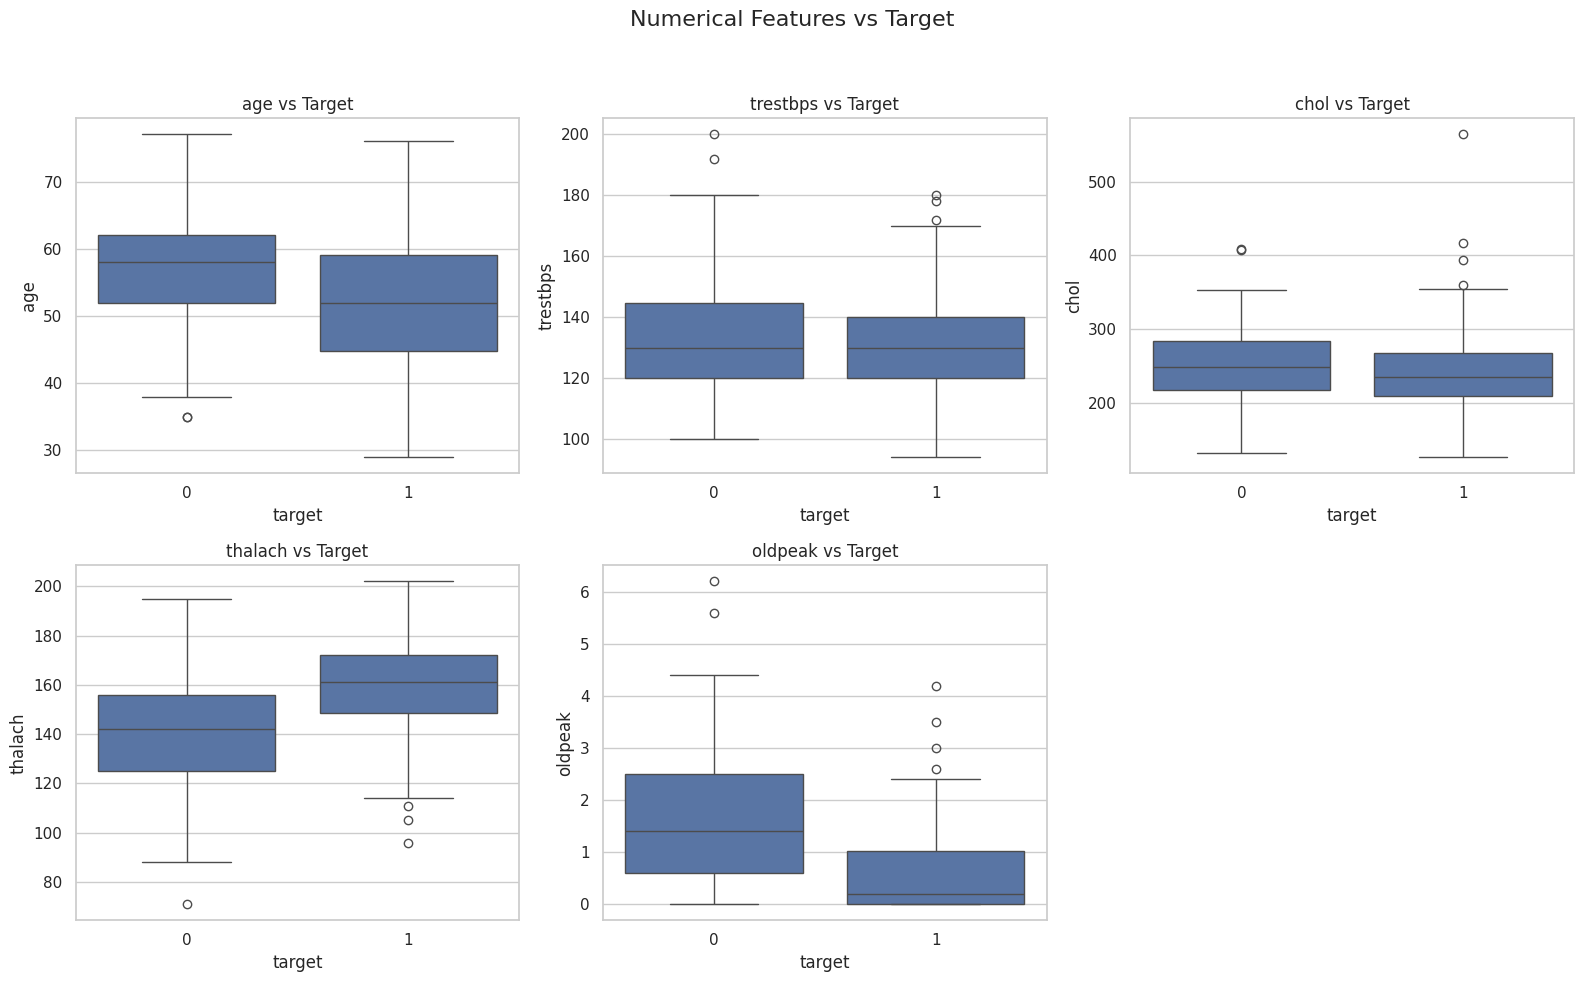

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.boxplot(x='target', y=col, data=df, ax=axes[i])
    axes[i].set_title(f"{col} vs Target")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Numerical Features vs Target", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Categorical vs Target

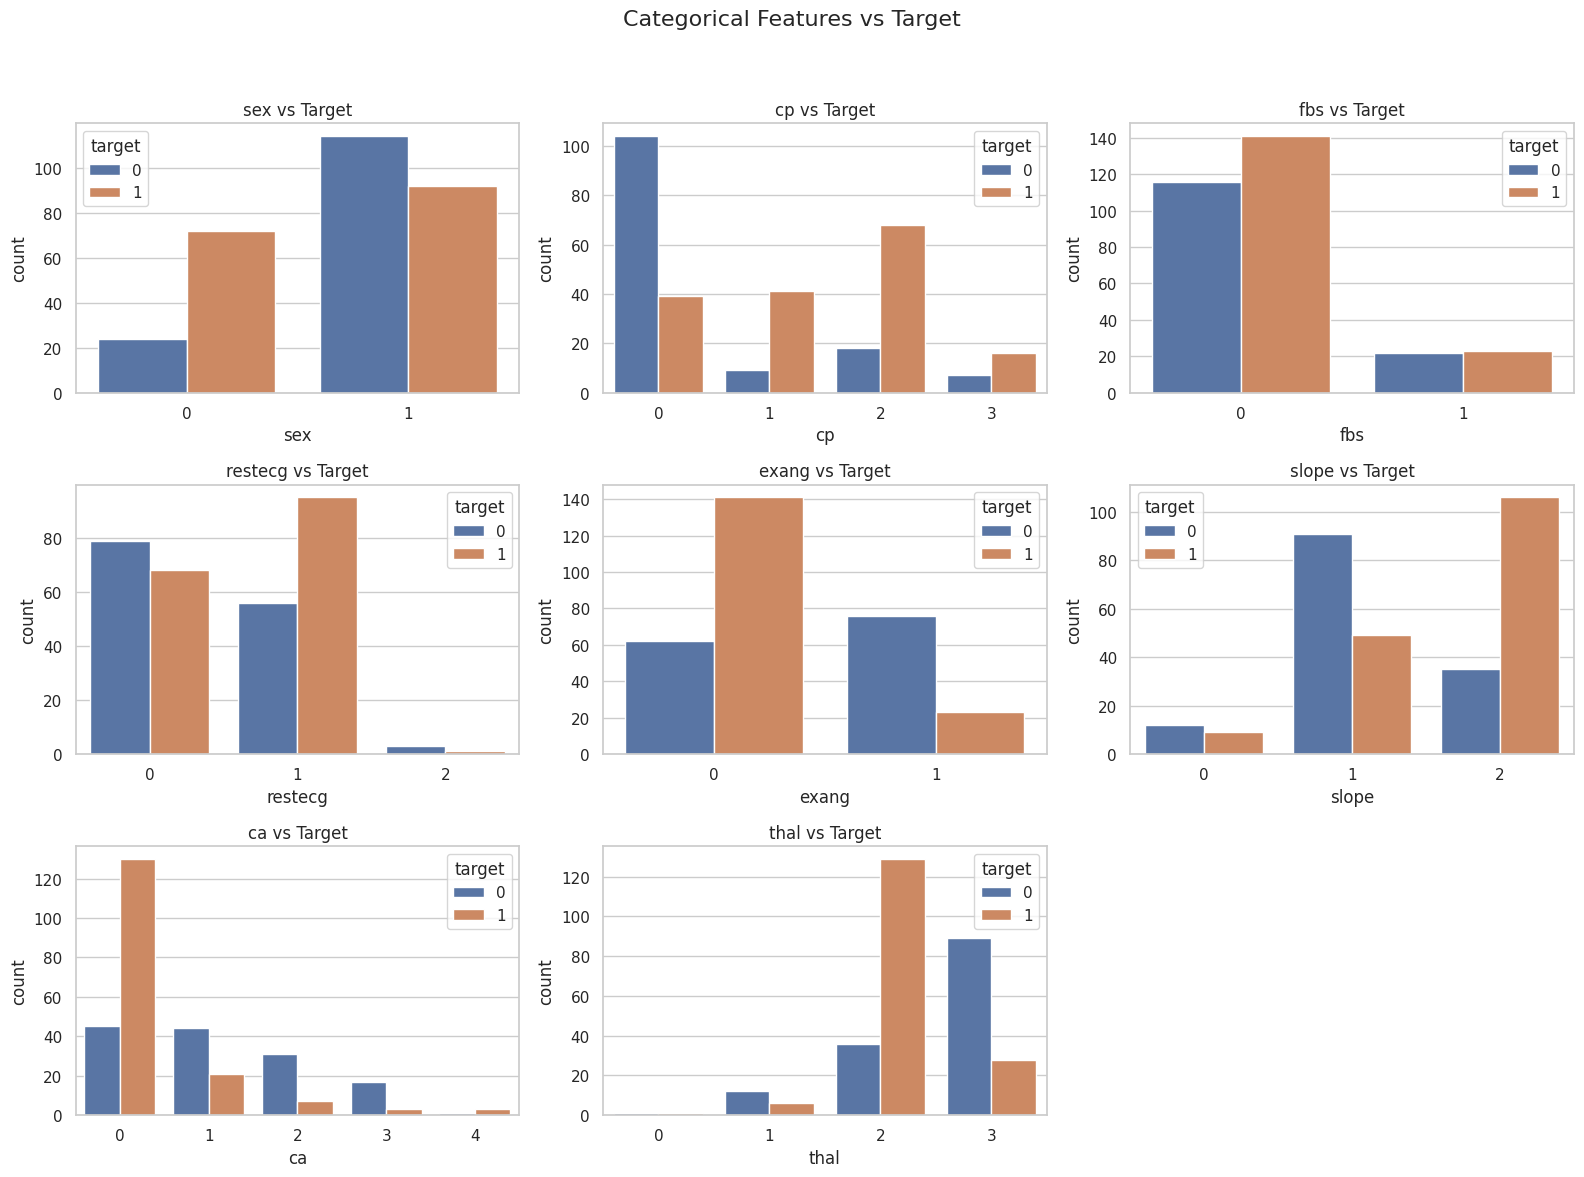

In [20]:
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(x=col, hue='target', data=df, ax=axes[i])
    axes[i].set_title(f"{col} vs Target")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Categorical Features vs Target", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Correlation Analysis

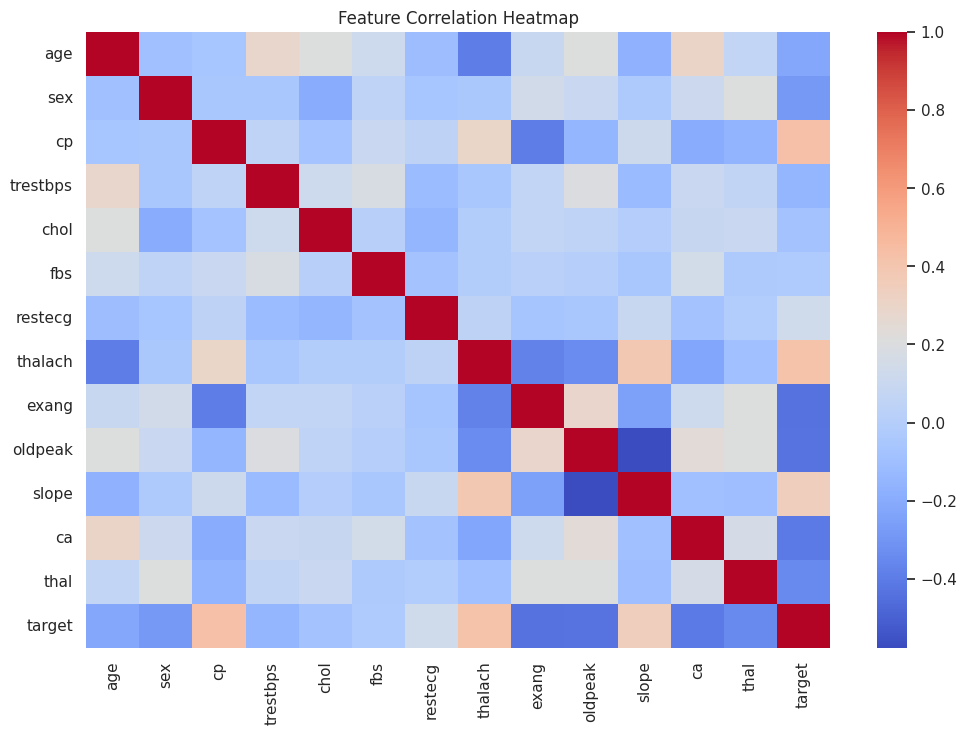

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


Outlier Visualization

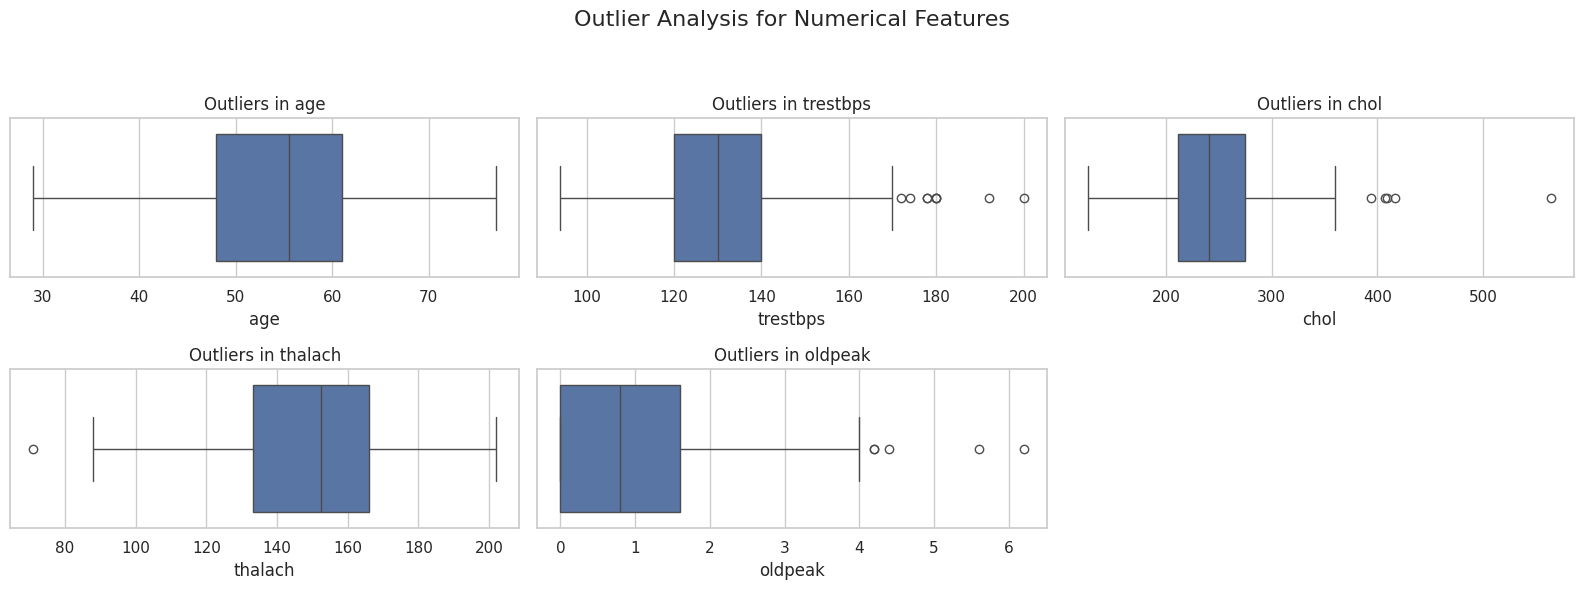

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(16, 6))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Outliers in {col}")
    axes[i].set_xlabel(col)

# Remove empty subplot(s) if any
for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Outlier Analysis for Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

Separating Features and Target


In [24]:
X = df.drop('target', axis=1)
y = df['target']


Dividing feature groups

In [ ]:
numerical_features = [
    'age', 'trestbps', 'chol', 'thalach', 'oldpeak'
]

categorical_features = [
    'sex', 'cp', 'fbs', 'restecg',
    'exang', 'slope', 'ca', 'thal'
]


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


Defining Transformer and doing scaling, encoding

In [27]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [28]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])


In [29]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [31]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [32]:
print("Training data shape:", X_train_processed.shape)
print("Test data shape:", X_test_processed.shape)



Training data shape: (241, 22)
Test data shape: (61, 22)


In [33]:
feature_names = (
    numerical_features +
    list(
        preprocessor.named_transformers_['cat']
        .named_steps['onehot']
        .get_feature_names_out(categorical_features)
    )
)

len(feature_names), feature_names[:10]


(22,
 ['age',
  'trestbps',
  'chol',
  'thalach',
  'oldpeak',
  'sex_1',
  'cp_1',
  'cp_2',
  'cp_3',
  'fbs_1'])

Training Model

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)


In [36]:
log_reg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        max_iter=1000,
        solver='liblinear',
        random_state=42
    ))
])


In [37]:
log_reg_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'ca', 'thal'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42,
                                    solver='liblinear'))])

In [38]:
y_pred = log_reg_model.predict(X_test)
y_pred_proba = log_reg_model.predict_proba(X_test)[:, 1]


In [39]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_pred_proba))


Accuracy : 0.8524590163934426
Precision: 0.875
Recall   : 0.8484848484848485
F1-score : 0.8615384615384616
ROC-AUC  : 0.9058441558441559


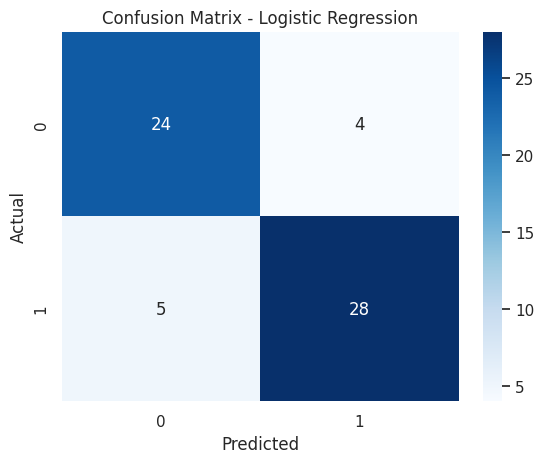

In [40]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [41]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.86      0.84        28
           1       0.88      0.85      0.86        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



Logistic Regression serves as a strong, interpretable baseline model.
Performance indicates that the dataset contains strong linear signals,
particularly from features such as oldpeak, cp, ca, and thal.


In [42]:
# Get feature names after preprocessing
num_features = numerical_features

cat_features = (
    log_reg_model.named_steps['preprocessor']
    .named_transformers_['cat']
    .named_steps['onehot']
    .get_feature_names_out(categorical_features)
)

feature_names = list(num_features) + list(cat_features)


In [43]:
coefficients = log_reg_model.named_steps['classifier'].coef_[0]

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

coef_df


,Feature,Coefficient
7,cp_2,1.515064
8,cp_3,1.450023
3,thalach,0.768224
20,thal_2,0.734134
6,cp_1,0.650853
19,thal_1,0.616756
14,slope_2,0.500639
10,restecg_1,0.412856
18,ca_4,0.369791
0,age,0.216153


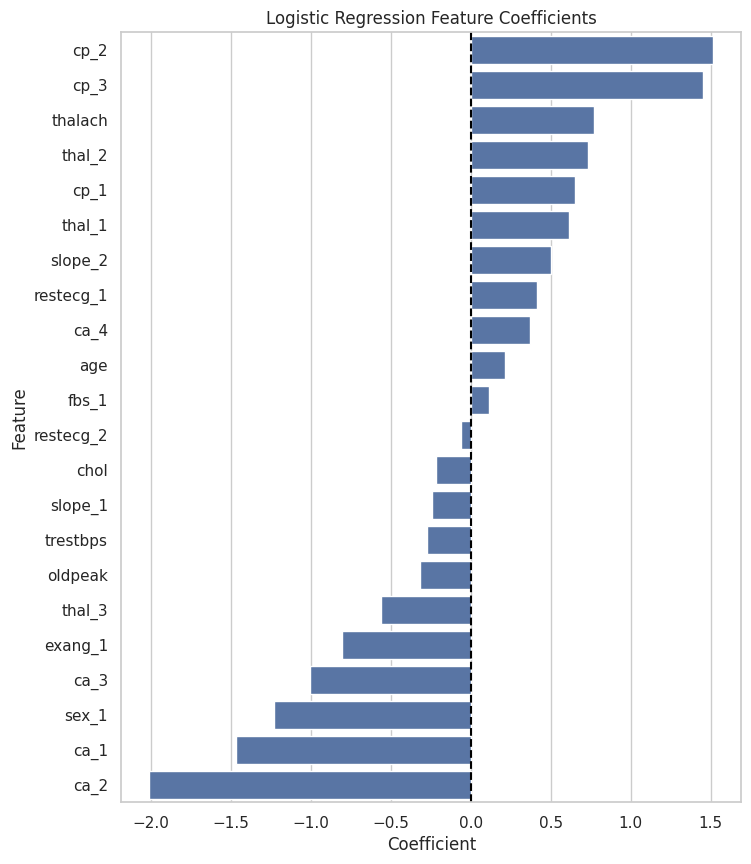

In [44]:
plt.figure(figsize=(8, 10))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=coef_df
)
plt.title("Logistic Regression Feature Coefficients")
plt.axvline(0, color='black', linestyle='--')
plt.show()


In [45]:
coef_df['Odds_Ratio'] = np.exp(coef_df['Coefficient'])
coef_df


,Feature,Coefficient,Odds_Ratio
7,cp_2,1.515064,4.549713
8,cp_3,1.450023,4.263215
3,thalach,0.768224,2.155933
20,thal_2,0.734134,2.083676
6,cp_1,0.650853,1.917176
19,thal_1,0.616756,1.852908
14,slope_2,0.500639,1.649776
10,restecg_1,0.412856,1.511128
18,ca_4,0.369791,1.447432
0,age,0.216153,1.241292


Coefficient Interpretation Summary:
Logistic Regression coefficients indicate the direction and strength of each
feature’s association with heart disease risk.
Positive coefficients increase predicted disease probability, while negative
coefficients decrease it. Strong effects are observed for clinical indicators
such as chest pain type (cp), ST depression (oldpeak), number of vessels (ca),
thalassemia (thal), and exercise-induced angina (exang), while features like
cholesterol and resting blood pressure have weaker independent effects.


In [46]:
from sklearn.model_selection import StratifiedKFold, cross_validate


In [52]:
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)


In [53]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}


In [54]:
cv_results = cross_validate(
    log_reg_model,
    X,
    y,
    cv=cv,
    scoring=scoring,
    return_train_score=False
)


In [56]:
for metric in scoring.keys():
    scores = cv_results[f'test_{metric}']
    print(
        f"{metric.upper():<10} "
        f"Mean: {scores.mean():.3f} | Std: {scores.std():.3f}"
    )


ACCURACY   Mean: 0.854 | Std: 0.037
PRECISION  Mean: 0.855 | Std: 0.060
RECALL     Mean: 0.891 | Std: 0.080
F1         Mean: 0.868 | Std: 0.036
ROC_AUC    Mean: 0.914 | Std: 0.027


param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}


Cross-Validation Summary:
5-fold stratified cross-validation was performed to assess model
robustness and generalization. Logistic Regression shows stable
performance across folds with consistently high ROC-AUC and balanced
precision-recall metrics, indicating that the model generalizes well
and is not overly sensitive to data splits.


MODEL COMPARISON: Logistic Regression vs Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate


In [71]:
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        min_samples_split=2,
        random_state=42,
        n_jobs=-1
    ))
])


In [ ]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}


In [72]:
rf_cv_results = cross_validate(
    rf_model,
    X,
    y,
    cv=cv,
    scoring=scoring,
    return_train_score=False
)


In [74]:
logreg_cv_results = cross_validate(
    log_reg_model,
    X,
    y,
    cv=cv,
    scoring=scoring,
    return_train_score=False
)


In [76]:
def summarize(results, name):
    print(f"\n{name}")
    for metric in scoring.keys():
        vals = results[f'test_{metric}']
        print(
            f"{metric.upper():<10} "
            f"Mean: {vals.mean():.3f} | Std: {vals.std():.3f}"
        )

summarize(logreg_cv_results, "Default Logistic Regression")
summarize(rf_cv_results, "Default Random Forest")





Default Logistic Regression
ACCURACY   Mean: 0.844 | Std: 0.034
PRECISION  Mean: 0.846 | Std: 0.045
RECALL     Mean: 0.878 | Std: 0.086
F1         Mean: 0.858 | Std: 0.038
ROC_AUC    Mean: 0.917 | Std: 0.019

Default Random Forest
ACCURACY   Mean: 0.778 | Std: 0.041
PRECISION  Mean: 0.799 | Std: 0.042
RECALL     Mean: 0.799 | Std: 0.106
F1         Mean: 0.793 | Std: 0.053
ROC_AUC    Mean: 0.893 | Std: 0.017


Default Model Comparison Interpretation:
Default Logistic Regression outperforms Default Random Forest across
all evaluation metrics, including accuracy, recall, and ROC-AUC.
The Logistic Regression model achieves particularly strong recall,
making it well-suited for disease screening tasks. These results
indicate that the dataset contains strong linear clinical signals
that are efficiently captured by Logistic Regression, while the
default Random Forest underperforms without hyperparameter tuning.

**Saving the Model**

In [77]:
import joblib


In [79]:
final_model = log_reg_model


In [80]:
final_model.fit(X, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'ca', 'thal'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42,
                                    solver='liblinear'))])

In [82]:


joblib.dump(final_model, "final_logistic_regression_model.pkl")




['final_logistic_regression_model.pkl']

In [84]:
import os
os.getcwd()

os.listdir()



['.config', 'sample_data', 'drive', 'final_logistic_regression_model.pkl']

In [85]:
loaded_model = joblib.load("final_logistic_regression_model.pkl")
loaded_model.predict(X.iloc[:5])



array([0, 0, 0, 0, 0])

Model Loading Note:
FileNotFoundError usually indicates a mismatch between the current
working directory and the file save location. Always verify the
working directory and ensure the model is saved and loaded from the
same path.